<img src="The-Northcap-University-NCU-logo.png">

# Deep Learning for Image Classification Drill


Welcome to your drill! Follow the instructions in bold below to complete the drill.

------------

## The Challenge

**Your task is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

#  Drill 1          
>## Convolutional Neural Network
>>### **BY Pranav Goel(18csu158)**

## The Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualizing the Data

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
single_image.shape

(28, 28)

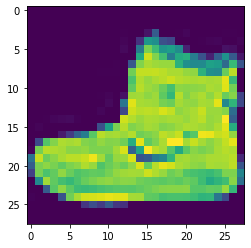

In [7]:
plt.imshow(single_image)

## Preprocessing the Data

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [8]:
single_image.max()

255

In [9]:
single_image.min()

0

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
scaled_single = x_train[0]

In [12]:
scaled_single.max()

1.0

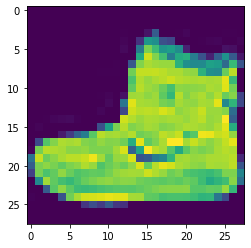

In [13]:
plt.imshow(scaled_single)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
x_test.shape

(10000, 28, 28)

In [16]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [17]:
x_train.shape

(60000, 28, 28, 1)

In [18]:
x_test = x_test.reshape(10000,28,28,1)

In [19]:
x_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
y_train.shape

(60000,)

In [22]:
y_example = to_categorical(y_train)

In [23]:
y_example

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [24]:
y_example.shape

(60000, 10)

In [25]:
y_example[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [26]:
y_1_test = to_categorical(y_test,10)

In [27]:
y_1_train = to_categorical(y_train,10)

## Building the Model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=32 and kernel_size=(4,4)
* Pooling Layer where pool_size = (2,2)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [29]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# https://keras.io/metrics/
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model
**TASK 6: Train/Fit the model to the x_train set. Amount of epochs is up to you.**

In [31]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)
model.fit(x_train,y_1_train,epochs=5,validation_data=(x_test,y_1_test),callbacks=[early_stop])

Epoch 1/5
1875/1875 [==============================] - 28s 14ms/step - loss: 0.5388 - accuracy: 0.8100 - val_loss: 0.3137 - val_accuracy: 0.8858
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2815 - accuracy: 0.8971 - val_loss: 0.2820 - val_accuracy: 0.8932
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2355 - accuracy: 0.9120 - val_loss: 0.2781 - val_accuracy: 0.8967
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1949 - accuracy: 0.9272 - val_loss: 0.2519 - val_accuracy: 0.9095
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1670 - accuracy: 0.9396 - val_loss: 0.2634 - val_accuracy: 0.9066


### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [32]:
model.metrics_names

['loss', 'accuracy']

In [34]:
import pandas as pd
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.403842,0.856000,0.313740,0.8858
1,0.274901,0.899483,0.281965,0.8932
2,0.231029,0.914617,0.278097,0.8967
3,0.198312,0.926300,0.251945,0.9095
4,0.171621,0.937433,0.263449,0.9066


<AxesSubplot:>

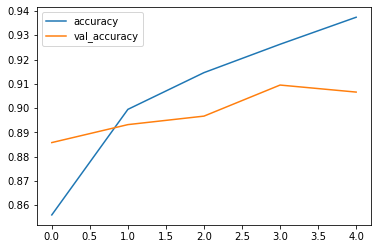

In [36]:
losses[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

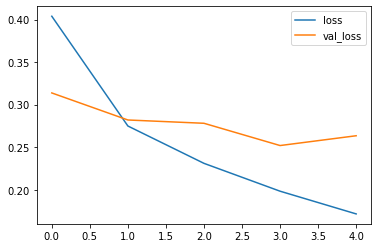

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
print(model.metrics_names)
print(model.evaluate(x_test,y_1_test,verbose=0))

['loss', 'accuracy']
[0.26344946026802063, 0.9065999984741211]


In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

C:\Users\PRANAV\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
y_1_test.shape

(10000, 10)

In [42]:
y_1_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [43]:
predictions[0]

9

In [44]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      1000
           1       0.99      0.98      0.98      1000
           2       0.85      0.85      0.85      1000
           3       0.94      0.88      0.91      1000
           4       0.80      0.89      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.74      0.75      0.74      1000
           7       0.92      0.99      0.96      1000
           8       0.97      0.99      0.98      1000
           9       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Great Job!